In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNet
from utils import get_regression_metrics

In [2]:
# Mostrar todas las filas
pd.set_option("display.max_rows", None)
# Mostrar todas las columnas
pd.set_option("display.max_columns", None)
# Ajustar el ancho de cada columna si es necesario
pd.set_option("display.max_colwidth", None)
# Aumentar el ancho total del display
pd.set_option("display.width", 0)

In [3]:
data =  pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=733&path=demographic_health_data.csv")
data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

## Análisis Descriptivo

In [4]:
f" Total de filas, {data.shape[0]} total de columnas {data.shape[1]}"

' Total de filas, 3140 total de columnas 108'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


El .info de este data set nos muestra un total de 106 columnas numericas y 2 de tipo object

In [6]:
data.isna().sum().sort_values(ascending=False)

fips                                                                             0
TOT_POP                                                                          0
0-9                                                                              0
0-9 y/o % of total pop                                                           0
19-Oct                                                                           0
10-19 y/o % of total pop                                                         0
20-29                                                                            0
20-29 y/o % of total pop                                                         0
30-39                                                                            0
30-39 y/o % of total pop                                                         0
40-49                                                                            0
40-49 y/o % of total pop                                                         0
50-5

ninguna de las variables muestra algun dato nan por lo cual los dice que no hace falta eliminar. 

In [7]:
if data.duplicated().sum():
    data = data.drop_duplicates()
data.head(20)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fips,3140.0,30401.640764,15150.559265,1001.000000,18180.500000,29178.000000,45081.500000,5.604500e+04
TOT_POP,3140.0,104189.412420,333583.395432,88.000000,10963.250000,25800.500000,67913.000000,1.010552e+07
0-9,3140.0,12740.302866,41807.301846,0.000000,1280.500000,3057.000000,8097.000000,1.208253e+06
0-9 y/o % of total pop,3140.0,11.871051,2.124081,0.000000,10.594639,11.802727,12.951840,2.546068e+01
19-Oct,3140.0,13367.976752,42284.392134,0.000000,1374.500000,3274.000000,8822.250000,1.239139e+06
10-19 y/o % of total pop,3140.0,12.694609,1.815044,0.000000,11.674504,12.687422,13.659282,2.330437e+01
20-29,3140.0,14469.331529,49577.725396,0.000000,1263.750000,3108.000000,8976.250000,1.557073e+06
20-29 y/o % of total pop,3140.0,12.283979,3.126297,0.000000,10.496774,11.772649,13.182260,3.757020e+01
30-39,3140.0,13916.490127,48990.951710,11.000000,1232.750000,3000.500000,8314.250000,1.501844e+06
30-39 y/o % of total pop,3140.0,11.751535,1.696599,6.092789,10.689322,11.580861,12.639379,2.222513e+01


## Fijar Target
En este caso vamos a tomar como target la prevalencia de diabetes al ser una de las mayores enfermedades presentadas por los pacientes.

In [9]:
target = "diabetes_prevalence"
corr = data.corr(numeric_only=True)[target].sort_values(ascending=False)
corr.head(15)


diabetes_prevalence           1.000000
diabetes_Upper 95% CI         0.998409
diabetes_Lower 95% CI         0.998069
CKD_Lower 95% CI              0.924630
CKD_prevalence                0.918514
CKD_Upper 95% CI              0.906711
anycondition_Lower 95% CI     0.856473
Heart disease_Lower 95% CI    0.855832
anycondition_prevalence       0.850219
anycondition_Upper 95% CI     0.842287
PCTPOV017_2018                0.840088
PCTPOV517_2018                0.833527
Heart disease_prevalence      0.831021
COPD_Lower 95% CI             0.811261
Heart disease_Upper 95% CI    0.803736
Name: diabetes_prevalence, dtype: float64

In [10]:
corr.tail(15)

Percent of adults completing some college or associate's degree 2014-18         -0.304245
30-39 y/o % of total pop                                                        -0.309565
% Asian-alone                                                                   -0.310418
Active Physicians per 100000 Population 2018 (AAMC)                             -0.324064
Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)          -0.349160
R_NATURAL_INC_2018                                                              -0.377873
Active Primary Care Physicians per 100000 Population 2018 (AAMC)                -0.387692
Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)   -0.401913
% White-alone                                                                   -0.410392
Med_HH_Income_Percent_of_State_Total_2018                                       -0.561531
Percent of adults with a bachelor's degree or higher 2014-18                    -0.669985
CI90UBINC_

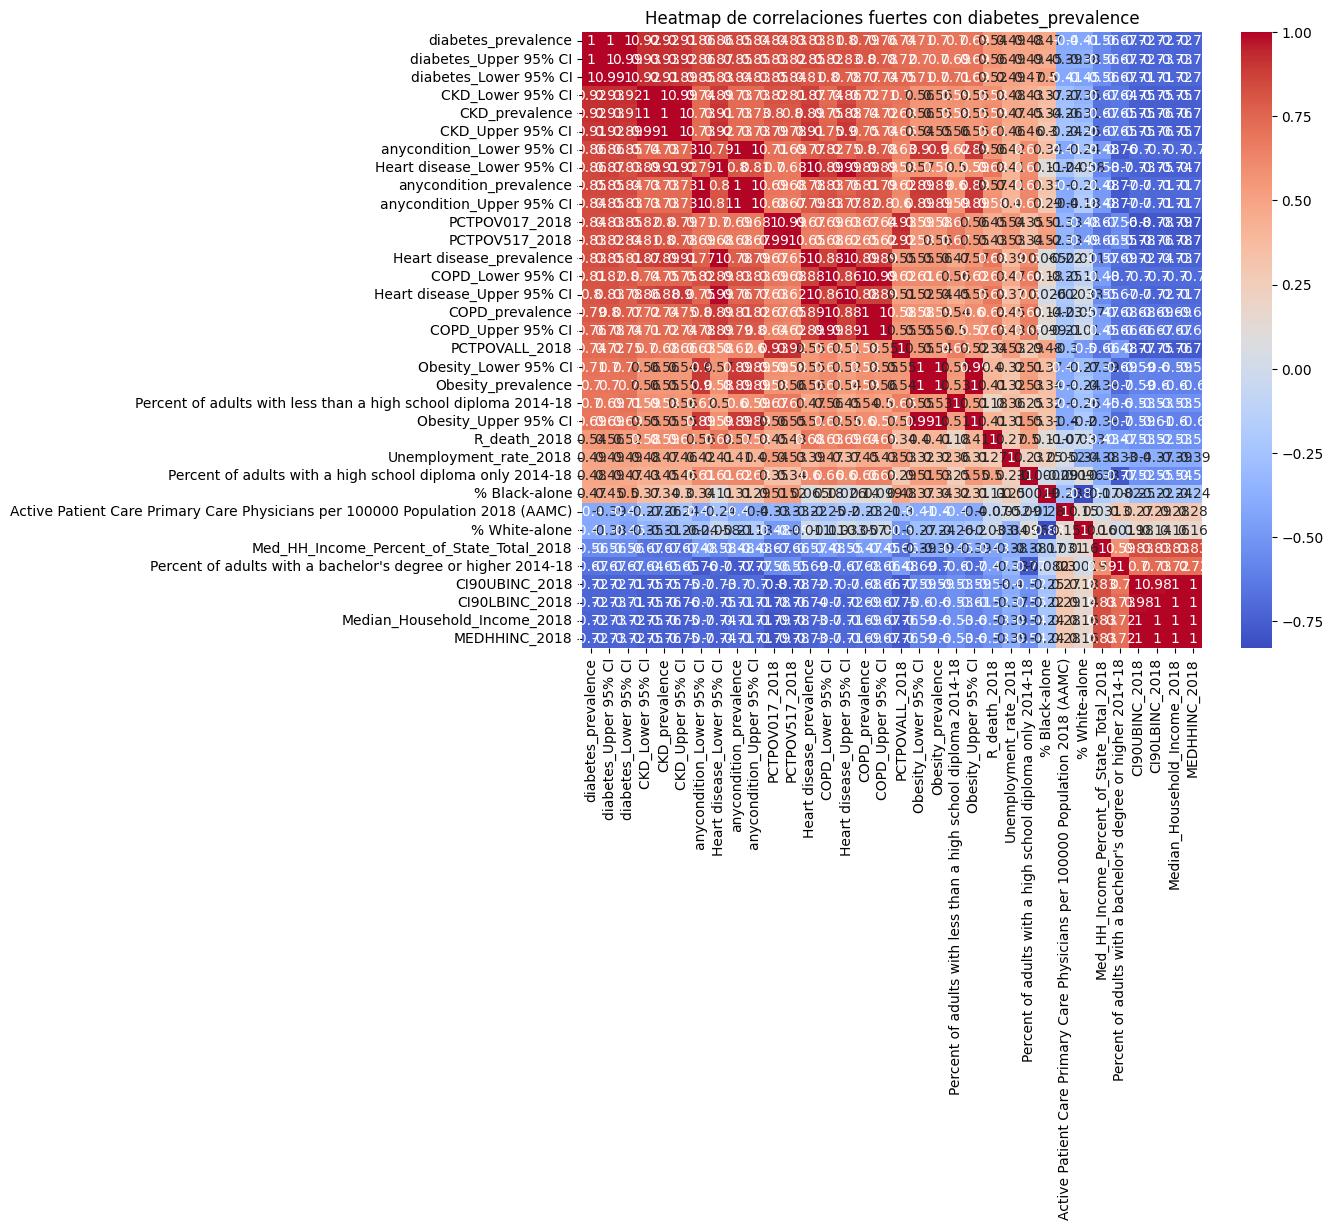

In [11]:
high_corr_cols = corr[abs(corr) > 0.4].index.tolist()

plt.figure(figsize=(10,8))
sns.heatmap(data[high_corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap de correlaciones fuertes con diabetes_prevalence")
plt.show()

### observaciones 
A primera vista podemos ver cuales son las variables mas relacionadas a nuestro objetivo.

In [12]:
data.columns = data.columns.str.strip().str.replace(r"\s+", " ", regex=True)
data.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)>

En este bloque buscamos organizar los nombres de las columnas para poder trabajar con ellas de manera mas ordenada.

In [13]:
cols_to_drop = ["anycondition_Lower 95% CI","anycondition_Upper 95% CI","Obesity_Lower 95% CI","Obesity_Upper 95% CI","Heart disease_Lower 95% CI","Heart disease_Upper 95% CI","COPD_Lower 95% CI","COPD_Upper 95% CI","CKD_Lower 95% CI","CKD_Upper 95% CI","MEDHHINC_2018","CI90UBINC_2018","CI90LBINC_2018"]
data = data.drop(columns=[c for c in cols_to_drop if c in data.columns])

elegimos borrar estas columnas por diferentes motivos, los cuales son:
 Las columnas Upper CI y Lower CI son casi una copia de la variable objetivo.
 Las columnas como Median_Household_Income_2018, MEDHHINC_2018 y otras representan exactamente la misma información
 White-alone,% Asian-alone,% Black-alone,% Two or more races Son columnas que capturan información muy similar (son porcentajes de la misma composición)


In [14]:
selected_features = ["Percent of adults with a bachelor's degree or higher 2014-18","Median_Household_Income_2018","PCTPOV517_2018","Obesity_prevalence","Heart disease_prevalence","COPD_prevalence","anycondition_prevalence","CKD_prevalence","60-69 y/o % of total pop","70-79 y/o % of total pop","80+ y/o % of total pop","Active Physicians per 100000 Population 2018 (AAMC)","Active Primary Care Physicians per 100000 Population 2018 (AAMC)"]
selected_features = [c for c in selected_features if c in data.columns]

Finalmente, se mantuvieron solo aquellas variables numéricas con alta relevancia predictiva y baja correlación entre sí, permitiendo obtener un modelo estable, interpretable y con excelente capacidad de generalización.

## SPLIT    

In [15]:
X = data[selected_features]
y = data["diabetes_prevalence"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling & Encoding

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

No fue necesario aplicar técnicas de encoding porque todas las variables seleccionadas para el modelo son numéricas. No existen variables categóricas en las features elegidas, por lo que el dataset ya es compatible con los algoritmos de regresión lineal y regularizada.

## Modelo regresion lineal

In [18]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_y_pred_train = lr_model.predict(X_train)
lr_y_pred_test = lr_model.predict(X_test)

get_regression_metrics(lr_y_pred_test, y_test, lr_y_pred_train, y_train)

,R2,MAE,MAPE,MSE,RMSE
Train set,0.949186,0.393056,3.733723,0.368848,0.607329
Test set,0.955283,0.375144,3.601831,0.359663,0.599719
Difference,0.006097,-0.017912,-0.131892,-0.009186,-0.007610


### observacion
La diferencia entre ambos es mínima, lo que indica una excelente capacidad de generalización y ausencia de overfitting. Las métricas de error (MAE ≈ 0.38; RMSE ≈ 0.60) muestran que el modelo predice la prevalencia de diabetes con una precisión notable.

### Regularización Lasso

In [19]:
lasso_model = Lasso(alpha=0.5, max_iter=400, random_state=18)
lasso_model.fit(X_train, y_train)

lasso_y_pred_test = lasso_model.predict(X_test)
lasso_y_pred_train = lasso_model.predict(X_train)
get_regression_metrics(lasso_y_pred_test, y_test, lasso_y_pred_train, y_train)

,R2,MAE,MAPE,MSE,RMSE
Train set,0.866151,0.627382,5.975700,0.971578,0.985687
Test set,0.853584,0.650434,6.162838,1.177643,1.085193
Difference,-0.012567,0.023051,0.187138,0.206065,0.099506


### Regularización ridge

In [20]:
ridge_model = Ridge(alpha=0.0001,
                    max_iter=5000,
                    random_state=18).fit(X_train, y_train)
ridge_y_pred_test = ridge_model.predict(X_test) 
ridge_y_pred_train = ridge_model.predict(X_train) 

get_regression_metrics(ridge_y_pred_test, y_test, ridge_y_pred_train, y_train)

,R2,MAE,MAPE,MSE,RMSE
Train set,0.949186,0.393056,3.733723,0.368848,0.607329
Test set,0.955283,0.375144,3.601831,0.359663,0.599719
Difference,0.006097,-0.017912,-0.131892,-0.009186,-0.007610


### LassoCV

In [21]:
lasso_cv_model = (LassoCV(alphas=np.logspace(-6, 6, 10),
                         cv=5,
                         random_state=18,
                         n_jobs=-1).fit(X_train, y_train))

lasso_cv_y_pred_test = lasso_cv_model.predict(X_test)  # Predicción en test
lasso_cv_y_pred_train = lasso_cv_model.predict(X_train)  # Predicción en train
get_regression_metrics(lasso_cv_y_pred_test, y_test, lasso_cv_y_pred_train, y_train)  # Métricas

,R2,MAE,MAPE,MSE,RMSE
Train set,0.949186,0.393053,3.733723,0.368848,0.607329
Test set,0.955283,0.375143,3.601833,0.359663,0.599719
Difference,0.006097,-0.017910,-0.131891,-0.009185,-0.007610


### ridgeCV

In [22]:
ridge_cv_model = RidgeCV(alphas=np.logspace(-6, 6, 10),
                         cv=5).fit(X_train, y_train)

ridge_cv_y_pred_test = ridge_cv_model.predict(X_test)  # Predicción en test
ridge_cv_y_pred_train = ridge_cv_model.predict(X_train)  # Predicción en train
get_regression_metrics(ridge_cv_y_pred_test, y_test, ridge_cv_y_pred_train, y_train)

,R2,MAE,MAPE,MSE,RMSE
Train set,0.949186,0.393056,3.733723,0.368848,0.607329
Test set,0.955283,0.375144,3.601831,0.359663,0.599719
Difference,0.006097,-0.017912,-0.131892,-0.009186,-0.007610


### ElasticNet

In [23]:
elasticnet_model = ElasticNet(alpha=0.0001,
                              max_iter=400,
                              random_state=18).fit(X_train, y_train)

elasticnet_y_pred_test = elasticnet_model.predict(X_test)
elasticnet_y_pred_train = elasticnet_model.predict(X_train)
get_regression_metrics(elasticnet_y_pred_test, y_test, elasticnet_y_pred_train, y_train)

,R2,MAE,MAPE,MSE,RMSE
Train set,0.949186,0.392072,3.733753,0.368851,0.607331
Test set,0.955275,0.375800,3.602344,0.359728,0.599773
Difference,0.006090,-0.016272,-0.131408,-0.009123,-0.007558


## Conclusion General
Todos los modelos regularizados (RidgeCV, LassoCV y ElasticNet) mostraron un rendimiento prácticamente idéntico, con un R² superior al 95% y errores muy bajos en el conjunto de test, sin evidencia de overfitting. RidgeCV fue seleccionado como modelo final debido a su estabilidad en los coeficientes y su robustez frente a la multicolinealidad, logrando un equilibrio óptimo entre sesgo y varianza